In [119]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков

In [120]:
%matplotlib inline

In [ ]:
# БДЗ 1.X

In [121]:
plasmaPage = pd.read_excel("src/data_matstat_K5.xls", sheet_name="C - plasma")

In [122]:
plC8 = plasmaPage.C8
plC10 = plasmaPage.C10
plC13 = plasmaPage.C13

print("Mean: ", plC8.mean(), plC10.mean(), plC13.mean())
print("Var: ", plC8.var(), plC10.var(), plC13.var())
print("Std: ", plC8.std(), plC10.std(), plC13.std())
print("Skew: ", plC8.skew(), plC10.skew(), plC13.skew())
print("Kurtosis: ", plC8.kurtosis(), plC10.kurtosis(), plC13.kurtosis())

Mean:  12.788571428571428 242.4606349206349 189.8920634920635
Var:  28.410951774340305 17421.786152461835 33489.2940450915
Std:  5.3301924706656045 131.9916139474847 183.00080340012582
Skew:  1.1529333799213661 1.4800546899219231 3.564154569285295
Kurtosis:  2.4835205022589943 3.4125850399648407 17.20900809044128


In [123]:
k = math.floor(1 + math.log(315, 2))
h = (plC8.max() - plC8.min()) / k

k, h

(9, 3.744444444444444)

In [124]:
pd.cut(plC8, k).value_counts(sort=False).values

array([37, 81, 95, 60, 24, 10,  4,  1,  3])

In [125]:
pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values

array([0.11746032, 0.25714286, 0.3015873 , 0.19047619, 0.07619048,
       0.03174603, 0.01269841, 0.0031746 , 0.00952381])

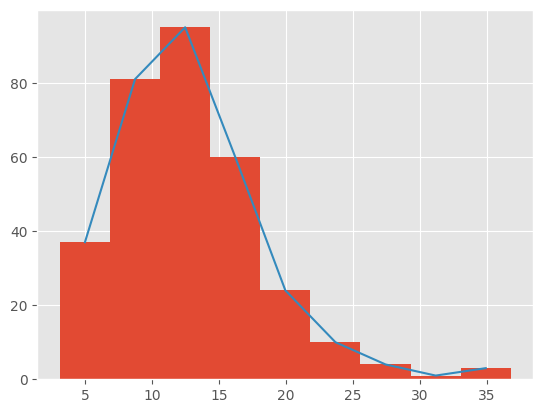

In [126]:
count,division = np.histogram(plC8, bins=k)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

plC8.hist(bins=k, density=False)
plt.plot(ar, count)

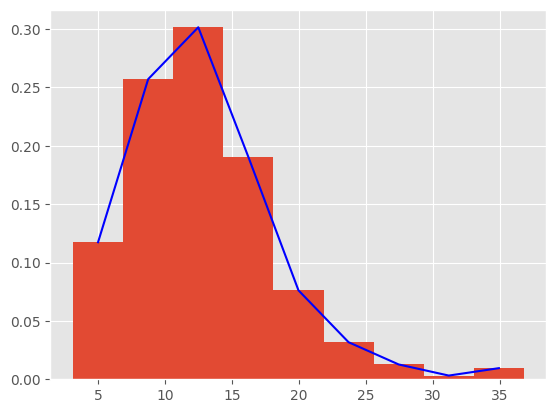

In [127]:
freqC8Rel = pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values
plt.bar(ar, freqC8Rel, width = h)
plt.plot(ar, freqC8Rel, color="blue")

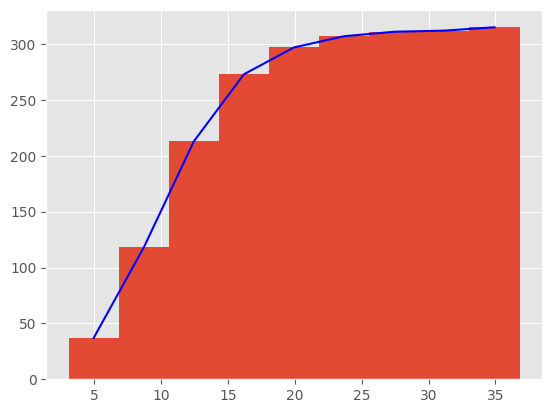

In [128]:
freqC8sum = pd.cut(plC8, bins=k).value_counts(sort=False).cumsum()
plt.hist(plC8, bins=k, cumulative=True)
plt.plot(ar, freqC8sum, color="blue")


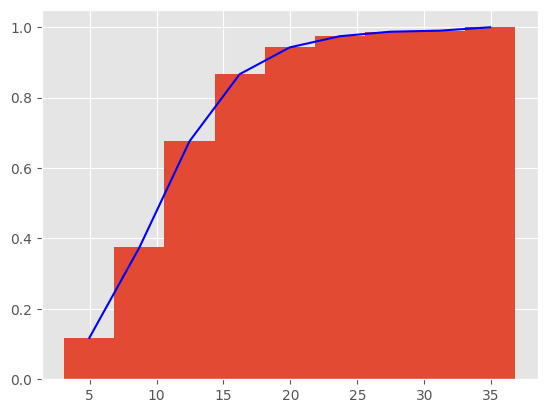

In [129]:
freqC8RelSum = pd.cut(plC8, bins=k).value_counts(sort=False, normalize = True).values.cumsum()
plt.bar(ar, freqC8RelSum, h)
plt.plot(ar, freqC8RelSum, color="blue")

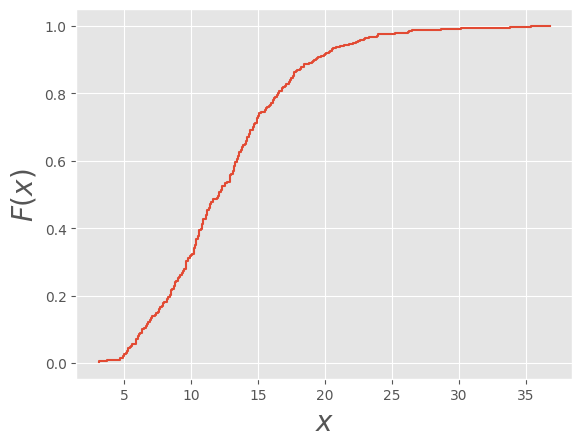

In [130]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(plC8)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

In [ ]:
# БДЗ 2.X